In [39]:
# name : nada mossad abodegham
# code : 320210097
# AID S2 G1

https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

**Problem Introduction:** 

*This project aims to develop an automated gender classification model based on facial features, encompassing long hair presence, forehead dimensions, nose characteristics, lip thinness, and the distance between the nose and lips.*

*On a societal level, the project seeks to contribute to gender equality. In the realm of security, integrating automated gender classification can enhance identification processes in public spaces and assist law enforcement agencies in investigations. Furthermore, the project's application extends to marketing and consumer analytics, offering potential benefits such as targeted advertising and insights into consumer behavior.*

*The approach involves data preprocessing, and the implementation of different machine learning algorithms, The success of the project will be gauged by the model's accuracy, precision, recall, and confusion matrix.*
______________________________________________________________________________________________________________________________________________________________________

**dataset description:**\
*This dataset contains 5001 rows and  7 features and a label column(gender)*

***long_hair** - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".*\
***forehead_width_cm** - This column is in CM's. This is the width of the forehead.*\
***forehead_height_cm** - This is the height of the forehead and it's in Cm's.*\
***nose_wide** - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".*\
***nose_long** - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".*\
***lips_thin** - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".*\
***distance_nose_to_lip_long** - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".*\
***gender** - This is either "Male" or "Female".*

In [40]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay,roc_curve,auc,mean_squared_error


In [41]:
# load the data
df = pd.read_csv("gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [42]:
# first five rows of the data
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [43]:
# random ten rows of the data
df.sample(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
1019,1,12.4,5.1,1,1,1,1,Male
2837,1,11.8,5.6,1,1,1,1,Male
1543,1,12.0,5.6,1,0,0,0,Female
2969,0,11.9,5.6,0,0,0,0,Female
1359,0,11.9,6.2,0,0,0,0,Female
1824,1,12.4,5.2,1,1,1,1,Male
3610,1,14.5,6.3,1,1,1,1,Male
1773,0,11.8,6.3,1,1,1,1,Male
4890,1,12.5,5.2,0,1,0,0,Female
2847,0,13.2,5.3,1,0,0,1,Female


In [44]:
# dataframe shape ->  8 columns and 5001 rows
df.shape

(5001, 8)

In [45]:
# info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [46]:
# knowing number of duplicate --> 1768
df.duplicated().sum()

1768

In [47]:
# delete the duplication
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

*Missing Values Treatment*

In [48]:
# find missing data  -> no missing values
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

*there is no need to Binning process, I will work with numerical data*


*Data Visualization*

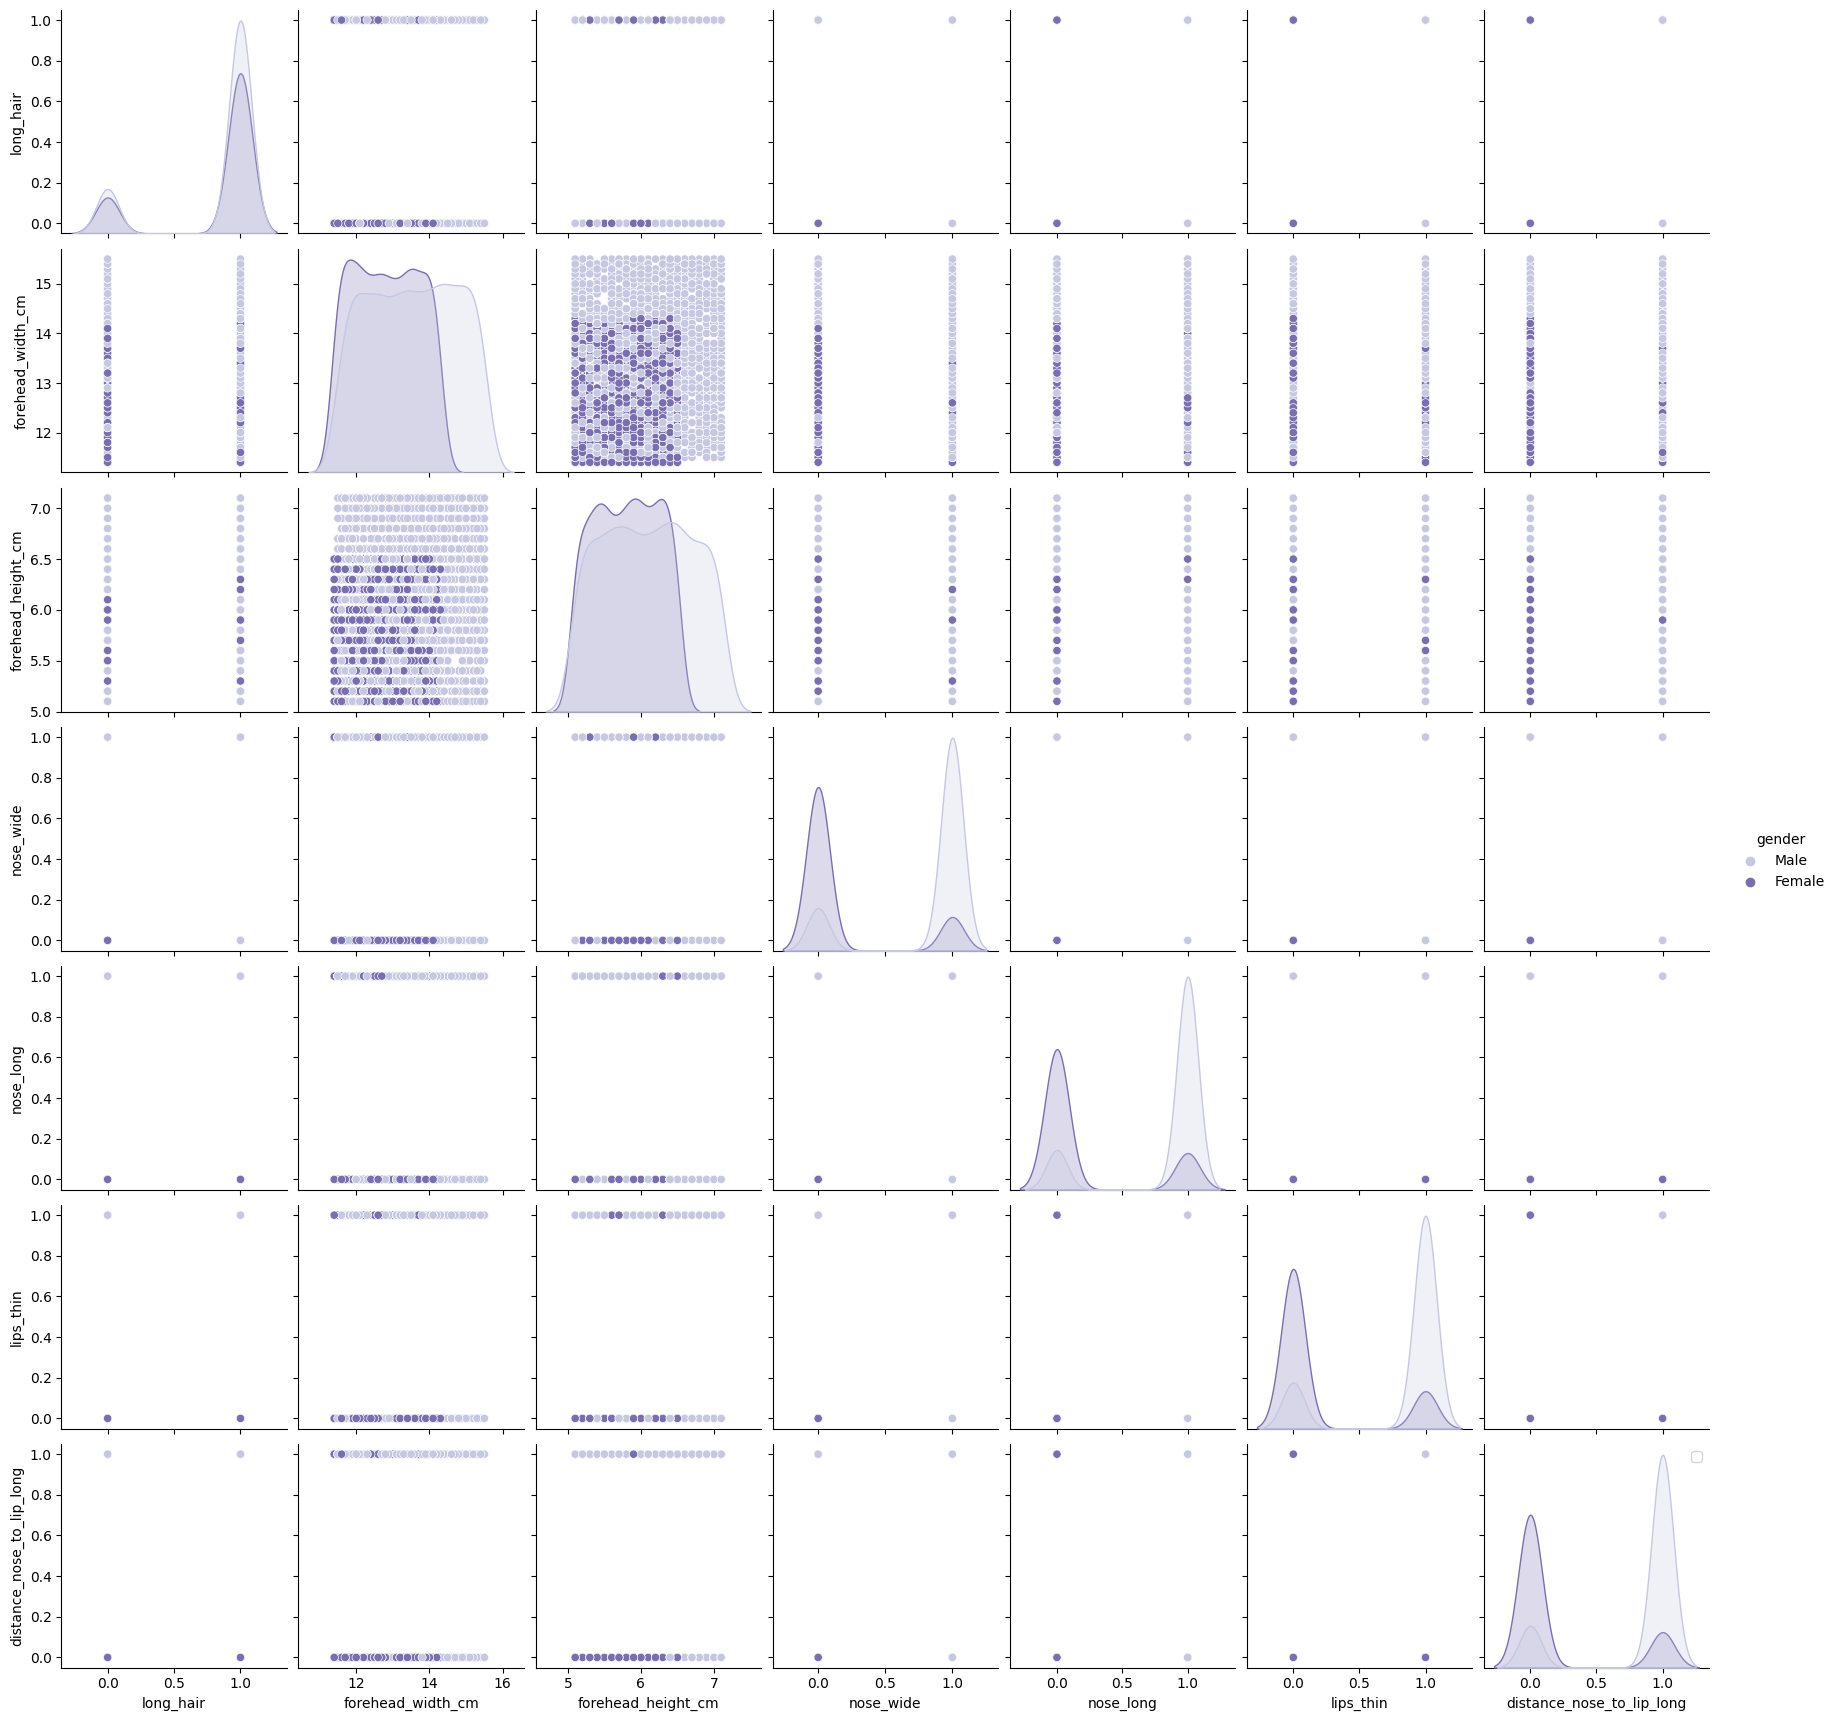

In [49]:
# scatter plots and kernel density estimate
sns.pairplot(
    df[
        [
            "long_hair",
            "forehead_width_cm",
            "forehead_height_cm",
            "nose_wide",
            "nose_long",
            "lips_thin",
            "distance_nose_to_lip_long",
            "gender",
        ]
    ],
    hue="gender",
    palette="Purples"
)
plt.legend()

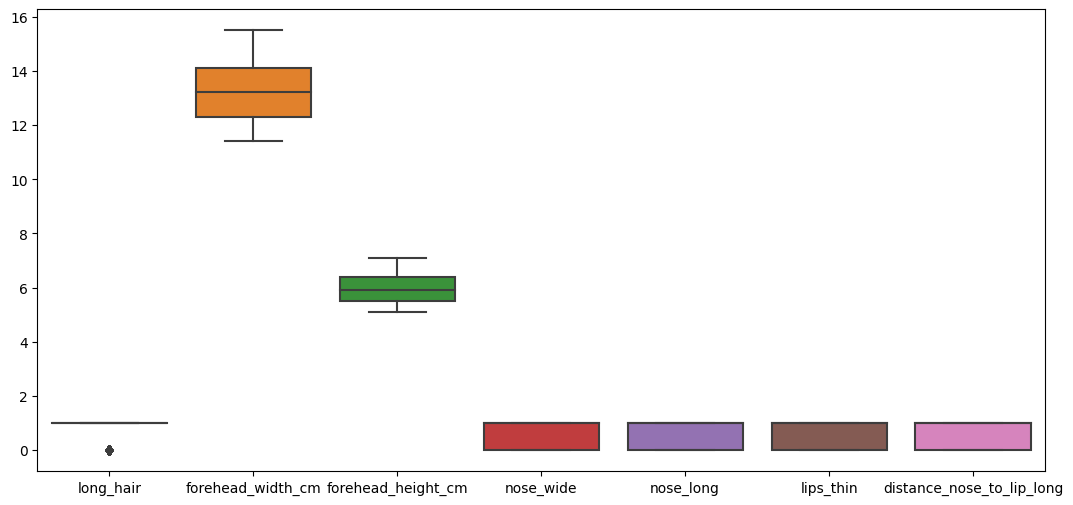

In [50]:
# drawing box plot to detect outliers
plt.figure(figsize=(13, 6))
sns.boxplot(df)
plt.show()

array([[<Axes: title={'center': 'long_hair'}>,
        <Axes: title={'center': 'forehead_width_cm'}>,
        <Axes: title={'center': 'forehead_height_cm'}>],
       [<Axes: title={'center': 'nose_wide'}>,
        <Axes: title={'center': 'nose_long'}>,
        <Axes: title={'center': 'lips_thin'}>],
       [<Axes: title={'center': 'distance_nose_to_lip_long'}>, <Axes: >,
        <Axes: >]], dtype=object)

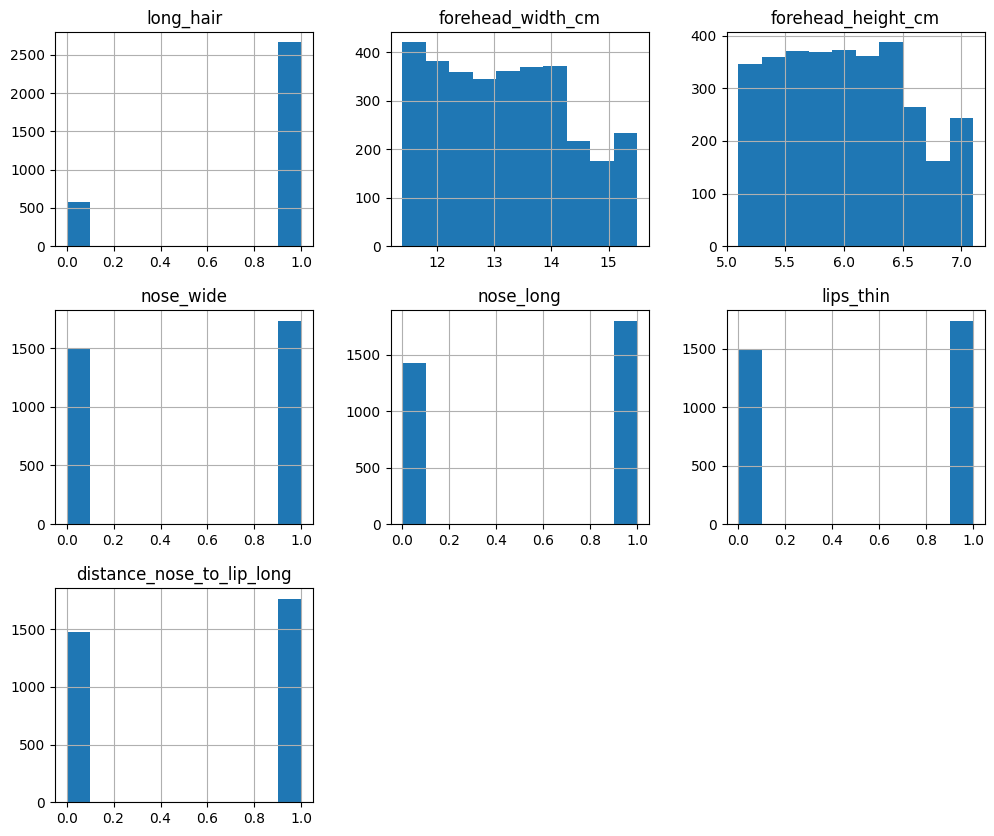

In [51]:
# histogram
df.hist(figsize=(12, 10))

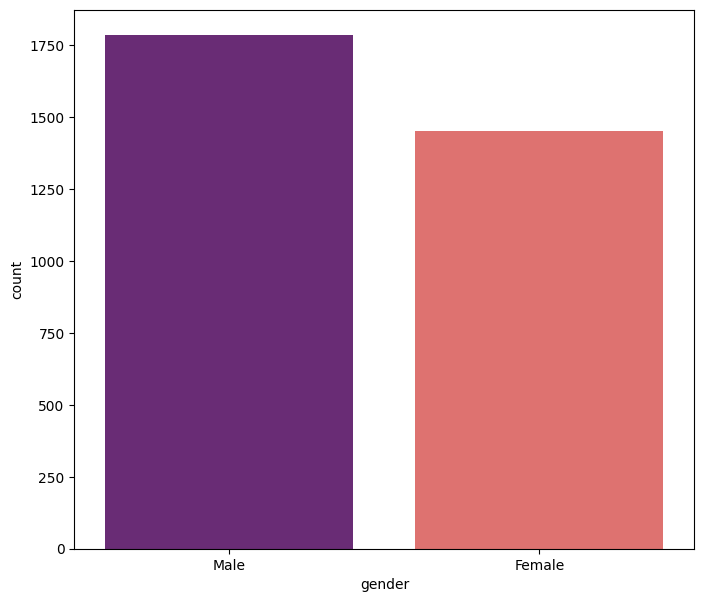

In [52]:
# count plots
plt.figure(figsize=(8, 7))
sns.countplot(x="gender", data=df, palette="magma")
plt.show()

*Data Analysis*

In [53]:
# Min, Max, Mean, Std
df.describe().T[["min", "max", "mean", "std"]]

,min,max,mean,std
long_hair,0.0,1.0,0.822456,0.382188
forehead_width_cm,11.4,15.5,13.217198,1.115993
forehead_height_cm,5.1,7.1,5.966038,0.549789
nose_wide,0.0,1.0,0.536344,0.498755
nose_long,0.0,1.0,0.557686,0.496738
lips_thin,0.0,1.0,0.538509,0.498592
distance_nose_to_lip_long,0.0,1.0,0.545314,0.498019


In [54]:
# Variance
df.var(numeric_only=True)

long_hair                    0.146067
forehead_width_cm            1.245441
forehead_height_cm           0.302268
nose_wide                    0.248756
nose_long                    0.246749
lips_thin                    0.248594
distance_nose_to_lip_long    0.248023
dtype: float64

In [55]:
# Skewness
df.skew(numeric_only=True)

long_hair                   -1.688467
forehead_width_cm            0.226676
forehead_height_cm           0.225240
nose_wide                   -0.145829
nose_long                   -0.232404
lips_thin                   -0.154567
distance_nose_to_lip_long   -0.182089
dtype: float64

In [56]:
# Kurtosis
df.kurtosis(numeric_only=True)

long_hair                    0.851446
forehead_width_cm           -0.942495
forehead_height_cm          -0.889602
nose_wide                   -1.979959
nose_long                   -1.947193
lips_thin                   -1.977333
distance_nose_to_lip_long   -1.968061
dtype: float64

In [57]:
# Covariance matrix
df.cov(numeric_only=True)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,0.146067,-0.005609,-0.001081,0.004598,0.008079,0.007149,-0.002163
forehead_width_cm,-0.005609,1.245441,0.048879,0.118125,0.117541,0.122729,0.114845
forehead_height_cm,-0.001081,0.048879,0.302268,0.049502,0.041904,0.046605,0.050116
nose_wide,0.004598,0.118125,0.049502,0.248756,0.097764,0.094438,0.098213
nose_long,0.008079,0.117541,0.041904,0.097764,0.246749,0.095318,0.093378
lips_thin,0.007149,0.122729,0.046605,0.094438,0.095318,0.248594,0.094557
distance_nose_to_lip_long,-0.002163,0.114845,0.050116,0.098213,0.093378,0.094557,0.248023


In [58]:
# Correlation
print(df.corr(numeric_only=True))

                           long_hair  forehead_width_cm  forehead_height_cm  \
long_hair                   1.000000          -0.013151           -0.005145   
forehead_width_cm          -0.013151           1.000000            0.079665   
forehead_height_cm         -0.005145           0.079665            1.000000   
nose_wide                   0.024123           0.212223            0.180526   
nose_long                   0.042556           0.212032            0.153438   
lips_thin                   0.037514           0.220566            0.170018   
distance_nose_to_lip_long  -0.011362           0.206636            0.183036   

                           nose_wide  nose_long  lips_thin  \
long_hair                   0.024123   0.042556   0.037514   
forehead_width_cm           0.212223   0.212032   0.220566   
forehead_height_cm          0.180526   0.153438   0.170018   
nose_wide                   1.000000   0.394605   0.379767   
nose_long                   0.394605   1.000000   0.38486

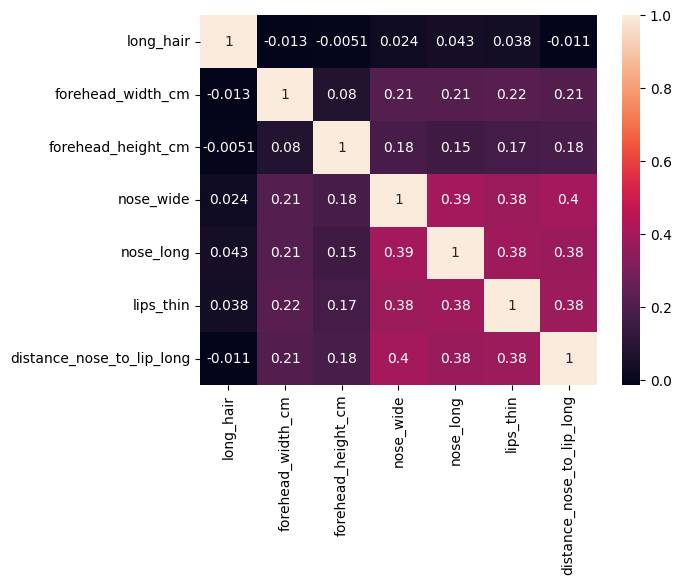

In [59]:
# Heap map
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [60]:
# Chi- square Test -> knowing the dependency and association of data 
stat, p, dof, expected = chi2_contingency(df[["long_hair","forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin","distance_nose_to_lip_long"]])

alpha = 0.05
print("the p value is " , p)
if p <= alpha:
    print("dependence") 
else:
    print("independence ") 

the p value is  1.0
independence 


In [61]:
# Z-test
# get sample of data
sample_size = 300
df_sample = df.sample(sample_size)
population_mean = df["long_hair"].mean()
population_std = df["long_hair"].std()
sample_mean = df_sample["long_hair"].mean()
alpha = 0.05

# z_test
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print("Z-Score :", z_score)


z_critical = stats.norm.ppf(1 - alpha)
print("Critical Z-Score :", z_critical)


if z_score > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Z-Score : -0.41343019804851133
Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis


In [62]:
# ANOVA -> comparing means
f_statistic, p_value = stats.f_oneway(
    df["long_hair"],
    df["forehead_width_cm"],
    df["forehead_height_cm"],
    df["nose_wide"],
    df["nose_long"],
    df["lips_thin"],
    df["distance_nose_to_lip_long"],
)

# Displaying results
print("F Statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. There is a significant difference between the means."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is no significant difference between the means."
    )

F Statistic: 199199.9751074745
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the means.


In [63]:
# spiliting the data into x(the predictors) and y(the one that we want to predict)
X = df.drop(["gender"], axis=1)
y = df["gender"]
y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4986      Male
4990    Female
4992      Male
4993    Female
4995      Male
Name: gender, Length: 3233, dtype: object

*Feature Reduction*

In [64]:
# Standardize the features -> removing the mean and scaling to unit variance.
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X))
scaled_data

,0,1,2,3,4,5,6
0,0.464619,-1.270095,0.243699,0.929772,-1.122871,0.925731,0.913130
1,-2.152302,0.701549,-1.029713,-1.075533,-1.122871,0.925731,-1.095135
2,-2.152302,-1.270095,0.607531,0.929772,0.890574,0.925731,0.913130
3,-2.152302,1.060029,0.243699,-1.075533,0.890574,0.925731,0.913130
4,0.464619,0.253448,-0.120133,-1.075533,-1.122871,-1.080227,-1.095135
...,...,...,...,...,...,...,...
3228,0.464619,-1.359715,0.243699,0.929772,0.890574,-1.080227,0.913130
3229,0.464619,-0.553133,-0.483965,-1.075533,-1.122871,0.925731,-1.095135
3230,0.464619,0.791169,1.880943,0.929772,0.890574,0.925731,0.913130
3231,0.464619,-1.449335,-0.120133,-1.075533,-1.122871,-1.080227,0.913130


In [65]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=1) # n_components = n_class - 1
X_lda = lda.fit_transform(scaled_data, y)
X_lda = pd.DataFrame(X_lda)
X_lda.head()

,0
0,0.975058
1,-1.692625
2,2.452029
3,1.325109
4,-3.008161


In [66]:
print("Original number of features:", X.shape)
print("Reduced number of features:", X_lda.shape)

Original number of features: (3233, 7)
Reduced number of features: (3233, 1)


In [67]:
# PCA
pca = PCA(n_components=5)
pca.fit(scaled_data,y)
X_pca = pca.transform(scaled_data)
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4
0,-0.458728,-0.522740,-0.886490,1.111068,0.149686
1,1.197887,2.056851,1.286475,-0.291706,1.702857
2,-1.401109,1.913993,-0.889624,1.854779,0.219148
3,-1.070031,2.233033,0.529419,-0.255941,1.080515
4,1.958509,-0.325956,0.034490,-1.061887,-0.069348


In [68]:
print("Original number of features:", X.shape)
print("Reduced number of features:", X_pca.shape)

Original number of features: (3233, 7)
Reduced number of features: (3233, 5)


In [69]:
svd = TruncatedSVD(n_components=3)
transformed = svd.fit_transform(X)
print("Original number of features:", X.shape)
print("Reduced number of features:", transformed.shape)

Original number of features: (3233, 7)
Reduced number of features: (3233, 3)


*Dataset splitting (80% training and 20% testing)*

In [70]:
# splitting the data into train and test , 2% will be for testing  , random for shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
# encoding female= 1 , male= 0
y_train = y_train.replace({"Female": 1, "Male": 0})
y_test = y_test.replace({"Female": 1, "Male": 0})

*Naive Bayesian*

In [72]:
# Applying naive Bayes and accuracy score
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


In [73]:
# K-fold cross validation and avarage accuracy
cross_val = cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy = cross_val.mean()
print("Average accuracy score: ", format(average_accuracy, "%"))
print("Accuracy score: ", format(accuracy_score(y_test, predictions), "%"))

Average accuracy score:  95.282406%
Accuracy score:  97.217929%


TN: 279, FP: 7, FN: 11, TP: 350
Error rate: 7.017001545595054
Precision: 0.9803921568627451
Recall :0.9695290858725761
f1-score: 0.9749303621169917
Specifity : 0.9755244755244755
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       361
           1       0.96      0.98      0.97       286

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



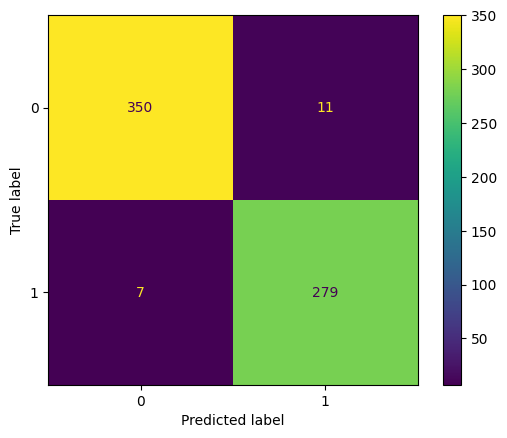

In [74]:
# confusion matrix
#overfitting 
tp, fn, fp, tn = confusion_matrix(y_test, predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

AUC (Area Under the Curve): 97.25%


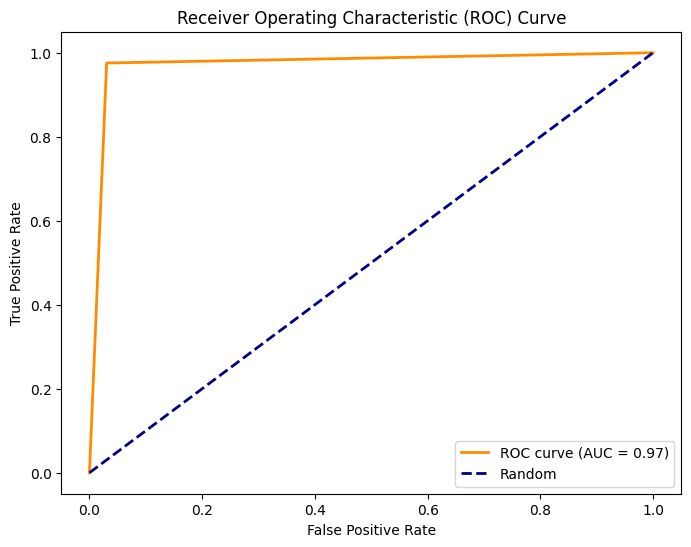

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*Bayesian Belief Network*

In [76]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from sklearn.metrics import accuracy_score

train = X_train.copy()
train["gender"] = y_train
bb_m = BayesianModel(
    [
        ("long_hair", "gender"),
        ("forehead_width_cm", "gender"),
        ("forehead_height_cm", "gender"),
        ("nose_wide", "gender"),
        ("nose_long", "gender"),
        ("lips_thin", "gender"),
        ("distance_nose_to_lip_long", "gender"),
    ]
)

bb_m.fit(train, estimator=MaximumLikelihoodEstimator)

bb_predictions = []
for index, row in X_test.iterrows():
    query = bb_m.predict(pd.DataFrame([row]))
    bb_predictions.append(query["gender"].values[0])

print("Accuracy score:", format(accuracy_score(y_test, bb_predictions), "%"))

100%|██████████| 1/1 [00:00<00:00, 63.99it/s]

Accuracy score: 55.795981%


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

TN: 0, FP: 286, FN: 0, TP: 361
Error rate: 286.0
Precision: 0.5579598145285936
Recall :1.0
f1-score: 0.7162698412698413
Specifity : 0.0
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       361
           1       0.00      0.00      0.00       286

    accuracy                           0.56       647
   macro avg       0.28      0.50      0.36       647
weighted avg       0.31      0.56      0.40       647



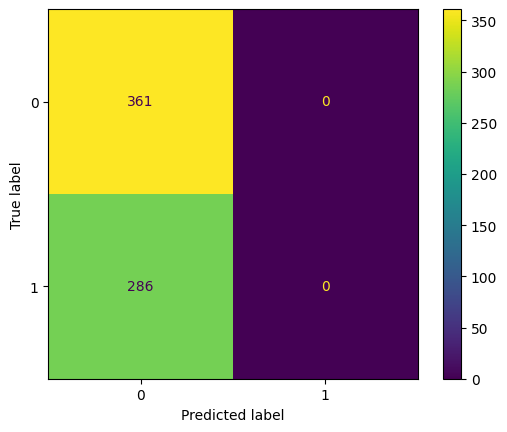

In [77]:
# confusion matrix
#no overfitting or underfitting
tp, fn, fp, tn = confusion_matrix(y_test, bb_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, bb_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, bb_predictions)
plt.show()

AUC (Area Under the Curve): 50.00%


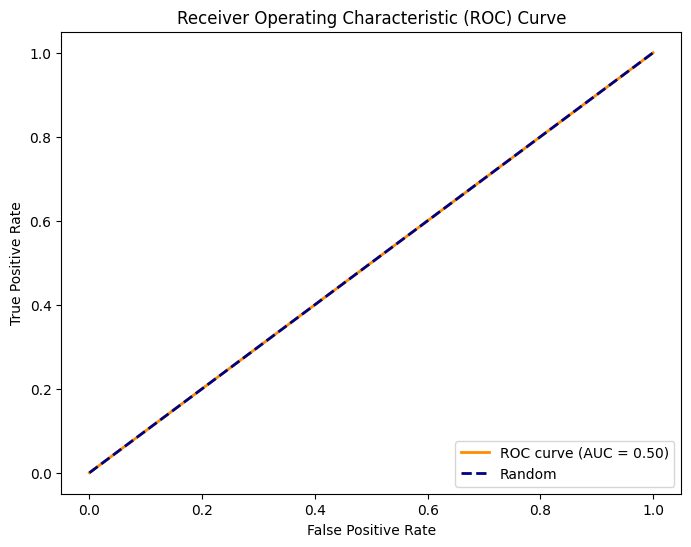

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, bb_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*Decision Tree*

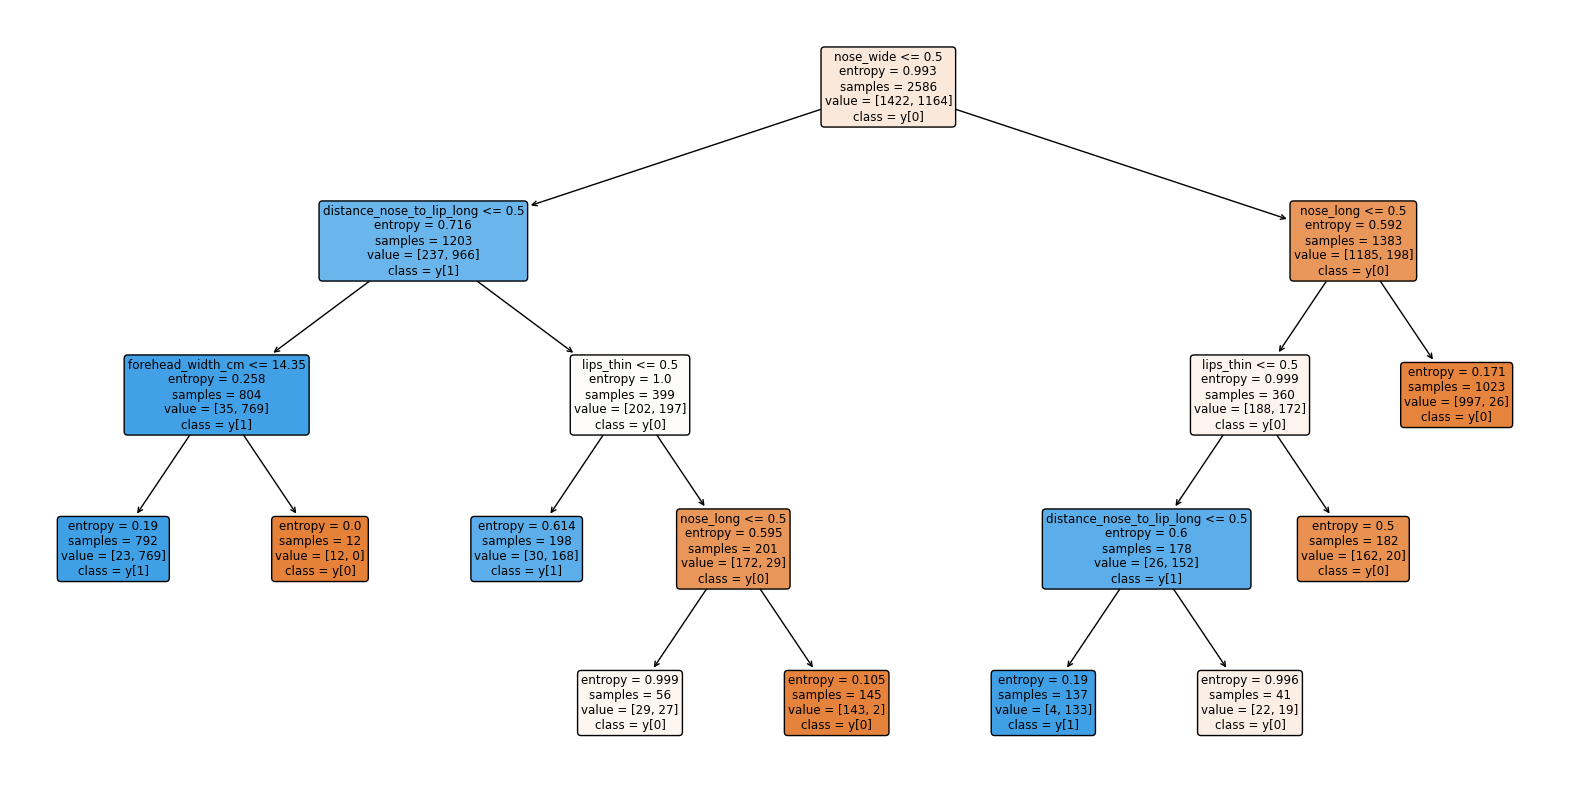

In [79]:
dt = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.015)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

plt.figure(figsize=(20, 10))
plot_tree(
    dt, filled=True, feature_names=X_train.columns, class_names=True, rounded=True
)
plt.show()

In [80]:
# K-fold cross validation and avarage accuracy
cross_val = cross_val_score(dt, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy = cross_val.mean()
print("Average accuracy score: ", format(average_accuracy, "%"))
print("Accuracy score:", format(accuracy_score(y_test, dt_predictions), "%"))

Average accuracy score:  93.503432%
Accuracy score: 96.290572%


In [81]:
# Mean square error
mse = mean_squared_error(y_test, dt_predictions)
mse

0.03709428129829984

TN: 268, FP: 18, FN: 6, TP: 355
Error rate: 18.009273570324574
Precision: 0.9517426273458445
Recall :0.9833795013850416
f1-score: 0.9673024523160763
Specifity : 0.9370629370629371
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       361
           1       0.98      0.94      0.96       286

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



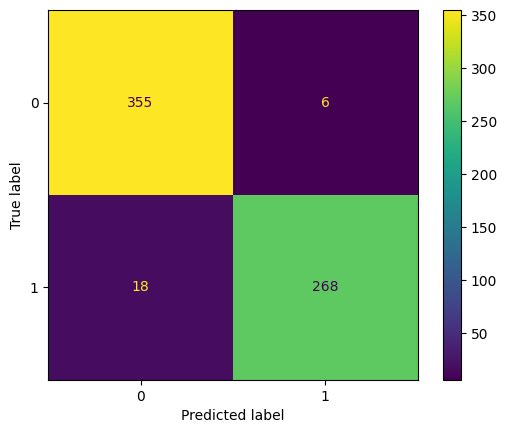

In [82]:
# confusion matrix
#overfitting 
tp, fn, fp, tn = confusion_matrix(y_test, dt_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, dt_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)
plt.show()

AUC (Area Under the Curve): 96.02%


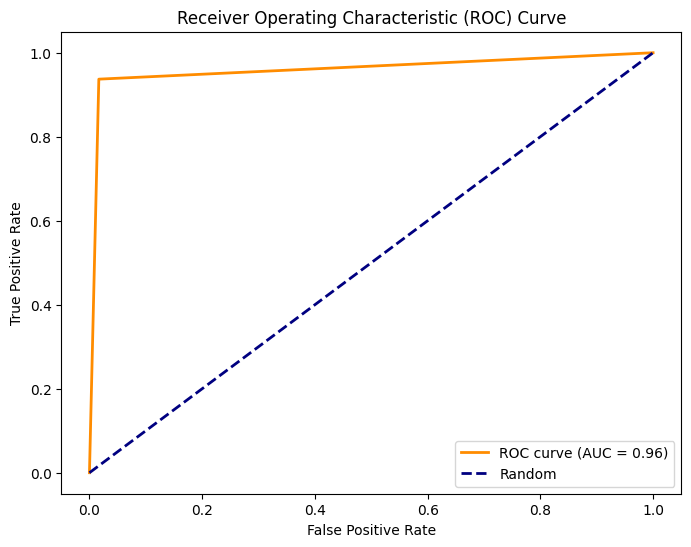

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

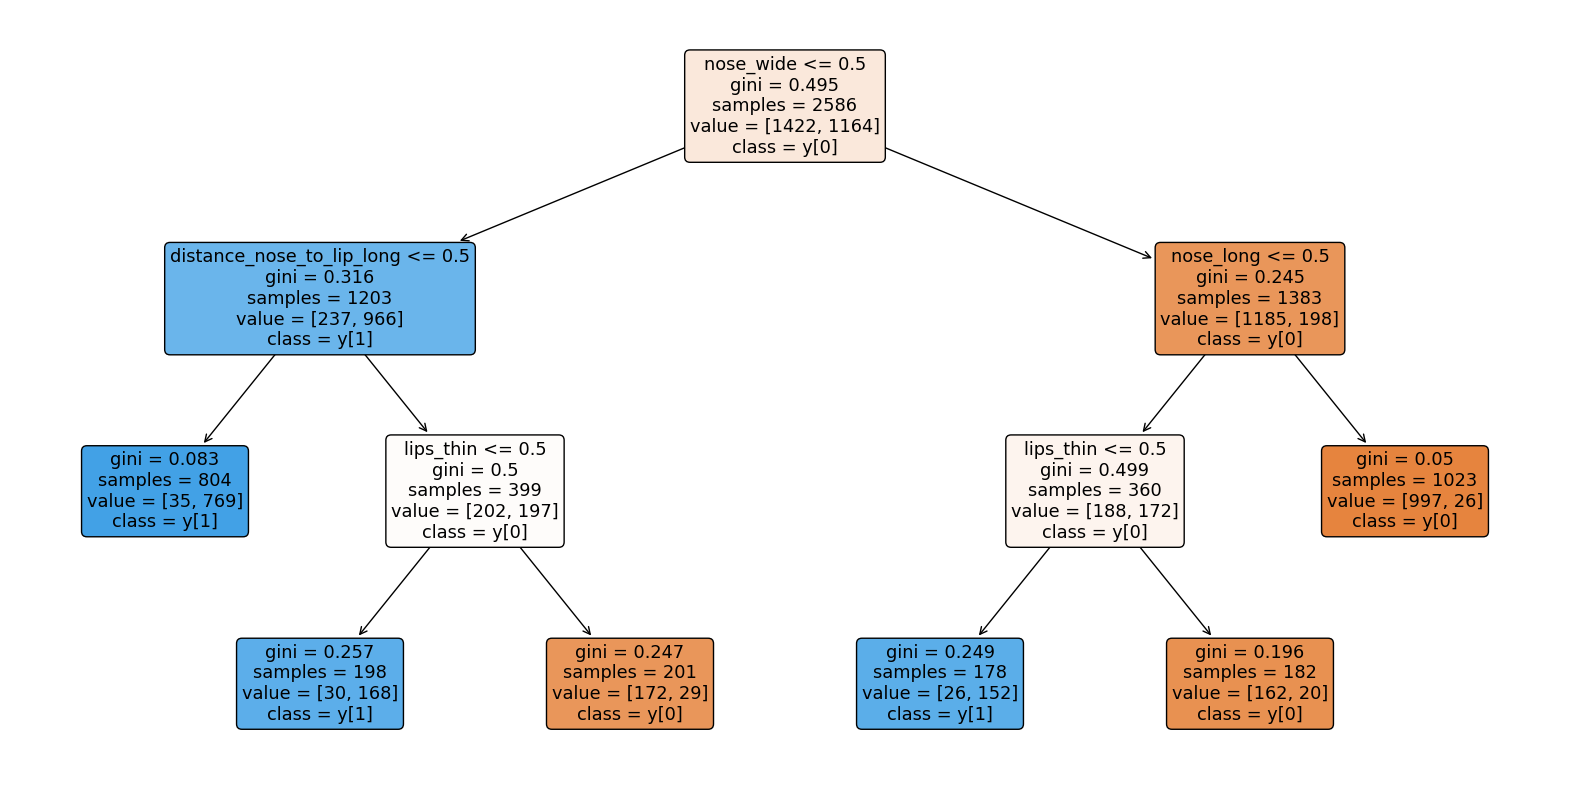

In [84]:
dt = DecisionTreeClassifier(criterion="gini", ccp_alpha=0.015)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

plt.figure(figsize=(20, 10))
plot_tree(
    dt, filled=True, feature_names=X_train.columns, class_names=True, rounded=True
)
plt.show()

In [85]:
# K-fold cross validation and avarage accuracy
cross_val = cross_val_score(dt, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy = cross_val.mean()
print("Average accuracy score: ", format(average_accuracy, "%"))
print("Accuracy score:", format(accuracy_score(y_test, dt_predictions), "%"))

Average accuracy score:  93.194029%
Accuracy score: 95.054096%


TN: 271, FP: 15, FN: 17, TP: 344
Error rate: 15.02627511591963
Precision: 0.958217270194986
Recall :0.9529085872576177
f1-score: 0.9555555555555556
Specifity : 0.9475524475524476
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       361
           1       0.94      0.95      0.94       286

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



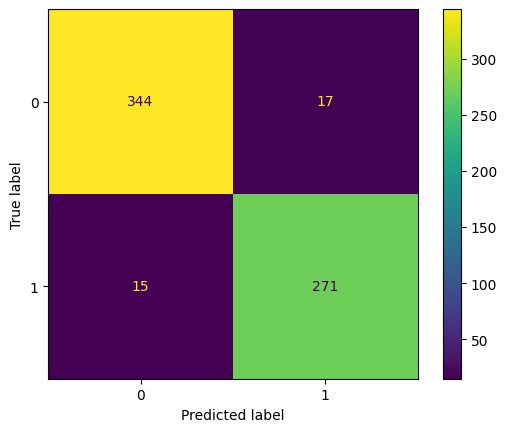

In [86]:
# confusion matrix
#overfitting 
tp, fn, fp, tn = confusion_matrix(y_test, dt_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, dt_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)
plt.show()

AUC (Area Under the Curve): 95.02%


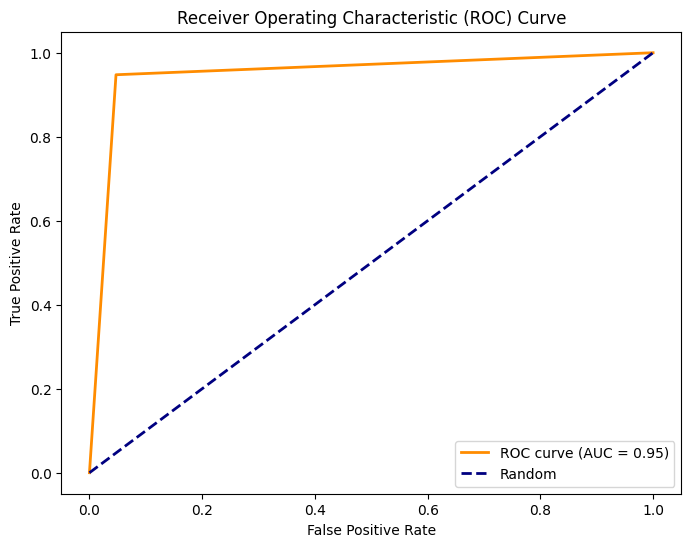

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*LDA*

In [88]:
lda_m = LinearDiscriminantAnalysis()
lda = lda_m.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)

In [89]:
# K-fold cross validation and avarage accuracy
cross_val = cross_val_score(lda, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy = cross_val.mean()
print("Average accuracy score: ", format(average_accuracy, "%"))
print("Accuracy score: ", format(accuracy_score(y_test, lda_predictions), "%"))

Average accuracy score:  94.663301%
Accuracy score:  96.599691%


TN: 272, FP: 14, FN: 8, TP: 353
Error rate: 14.012364760432767
Precision: 0.9618528610354223
Recall :0.9778393351800554
f1-score: 0.9697802197802198
Specifity : 0.951048951048951
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       361
           1       0.97      0.95      0.96       286

    accuracy                           0.97       647
   macro avg       0.97      0.96      0.97       647
weighted avg       0.97      0.97      0.97       647



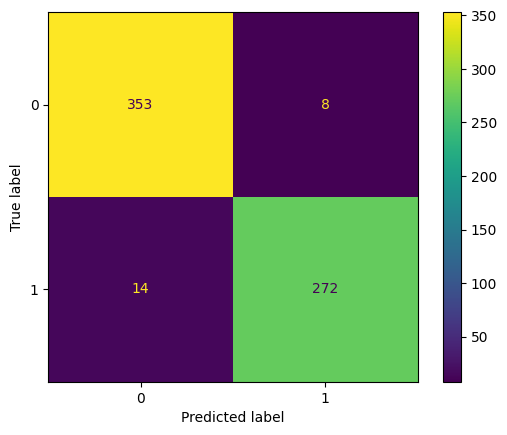

In [90]:
# confusion matrix
#overfitting 
tp, fn, fp, tn = confusion_matrix(y_test, lda_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, lda_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

AUC (Area Under the Curve): 96.44%


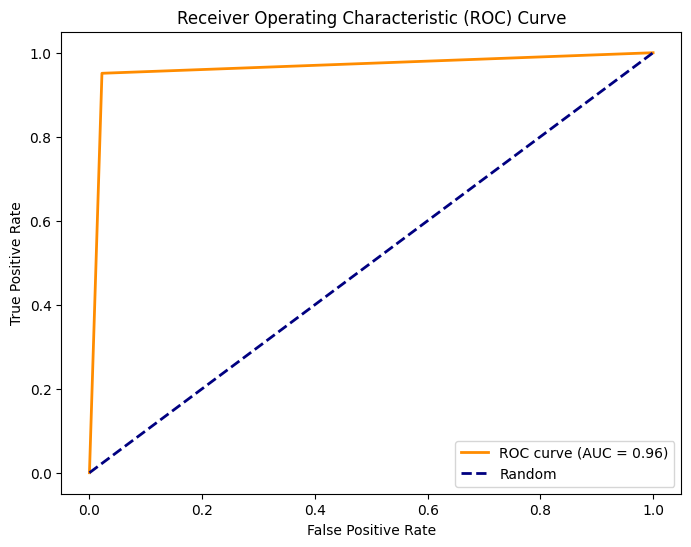

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, lda_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*PCA*

In [92]:
# PCA
pca_xtrain, pca_xtest, pca_ytrain, pca_ytest = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# # encoding female= 1 , male= 0
pca_ytrain = pca_ytrain.replace({"Female": 1, "Male": 0})
pca_ytest = pca_ytest.replace({"Female": 1, "Male": 0})


model = LogisticRegression()
model.fit(pca_xtrain, pca_ytrain)
pca_predictions = (model.predict_proba(pca_xtest)[:, 1] > 0.5).astype(int)

In [93]:
# K-fold cross validation and avarage accuracy
cross_val = cross_val_score(model, pca_xtrain, pca_ytrain ,cv=5, scoring="accuracy")
average_accuracy = cross_val.mean()
print("Average accuracy score: ", format(average_accuracy, "%"))
print("Accuracy score: ", format(accuracy_score(pca_ytest, pca_predictions), "%"))

Average accuracy score:  94.663301%
Accuracy score:  96.445131%


TN: 297, FP: 11, FN: 12, TP: 327
Error rate: 11.018547140649149
Precision: 0.9674556213017751
Recall :0.9646017699115044
f1-score: 0.96602658788774
Specifity : 0.9642857142857143
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       339
           1       0.96      0.96      0.96       308

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



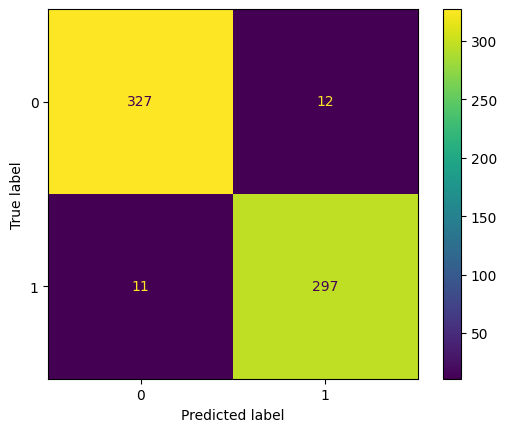

In [94]:
# confusion matrix
#overfitting 
tp, fn, fp, tn = confusion_matrix(pca_ytest, pca_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(pca_ytest, pca_predictions))
ConfusionMatrixDisplay.from_predictions(pca_ytest, pca_predictions)
plt.show()

AUC (Area Under the Curve): 50.75%


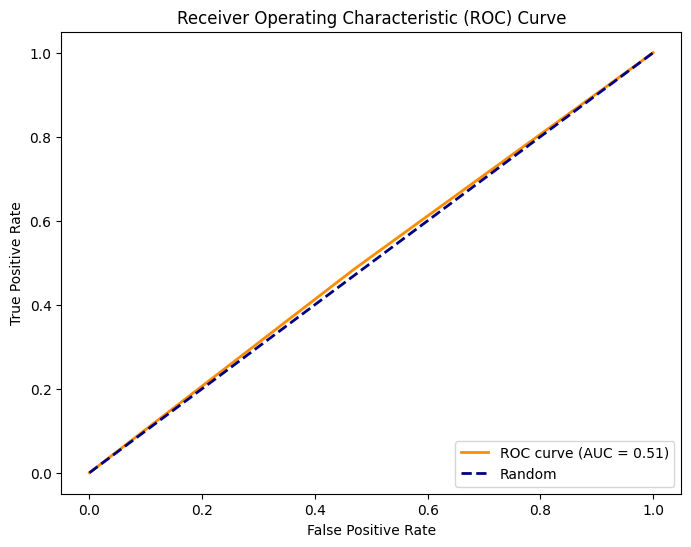

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, pca_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [96]:
nn = keras.Sequential(
    [
        keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)  # binary classification


nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss, test_acc = nn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

nn_probabilities = nn.predict(X_test)
# nn_predictions = (nn_probabilities >= 0.5).astype(int)
# nn_predictions= model.predict_classes(X_test)
# nn_predictions
nn_predictions = np.round(nn_probabilities).astype(int)

Epoch 1/100
65/65 [==============================] - 1s 5ms/step - loss: 0.6551 - accuracy: 0.7007 - val_loss: 0.4874 - val_accuracy: 0.7413
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.9120 - val_loss: 0.2669 - val_accuracy: 0.9208
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9250 - val_loss: 0.1911 - val_accuracy: 0.9324
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9217 - val_loss: 0.1653 - val_accuracy: 0.9305
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9255 - val_loss: 0.1535 - val_accuracy: 0.9266
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9270 - val_loss: 0.1584 - val_accuracy: 0.9189
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9212 - val_loss: 0.1489 - val_accuracy: 0.9228
Epoch 8/100
6

In [97]:
print("Accuracy score: ", format(accuracy_score(y_test, nn_predictions), "%"))

Accuracy score:  94.899536%


In [123]:
# draw the structure of the model
tf.keras.utils.plot_model(
    nn,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


TN: 254, FP: 32, FN: 1, TP: 360
Error rate: 32.0015455950541
Precision: 0.9183673469387755
Recall :0.997229916897507
f1-score: 0.9561752988047809
Specifity : 0.8881118881118881
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       361
           1       1.00      0.89      0.94       286

    accuracy                           0.95       647
   macro avg       0.96      0.94      0.95       647
weighted avg       0.95      0.95      0.95       647



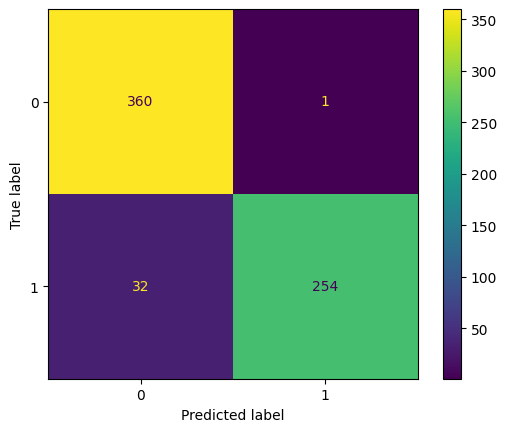

In [99]:
# confusion matrix
# overfitting
y_test.replace({"Female": 1, "Male": 0})
tp, fn, fp, tn = confusion_matrix(y_test, nn_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, nn_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, nn_predictions)
plt.show()

AUC (Area Under the Curve): 94.27%


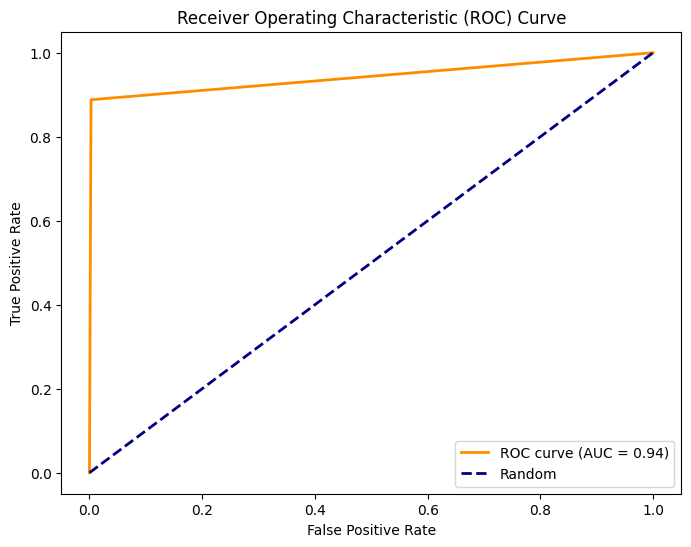

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, nn_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*KNN*

In [101]:
#Euclidean distance
knn_m = KNeighborsClassifier(n_neighbors=30)
knn_m.fit(X_train, y_train)
knn_predictions = knn_m.predict(X_test)

In [102]:
# K-fold cross validation and avarage accuracy
cross_val = cross_val_score(knn_m, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy = cross_val.mean()
print("Average accuracy score: ", format(average_accuracy, "%"))
print("Accuracy score: ", format(accuracy_score(y_test, knn_predictions), "%"))

Average accuracy score:  95.166426%
Accuracy score:  97.063369%


TN: 279, FP: 7, FN: 12, TP: 349
Error rate: 7.01854714064915
Precision: 0.9803370786516854
Recall :0.9667590027700831
f1-score: 0.9735006973500697
Specifity : 0.9755244755244755
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       361
           1       0.96      0.98      0.97       286

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



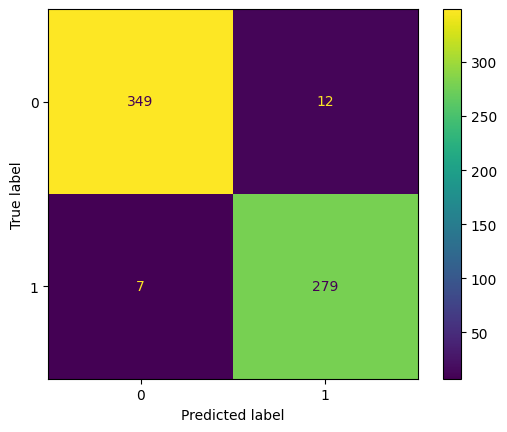

In [103]:
# confusion matrix
# overfitting
tp, fn, fp, tn = confusion_matrix(y_test, knn_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, knn_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

AUC (Area Under the Curve): 97.11%


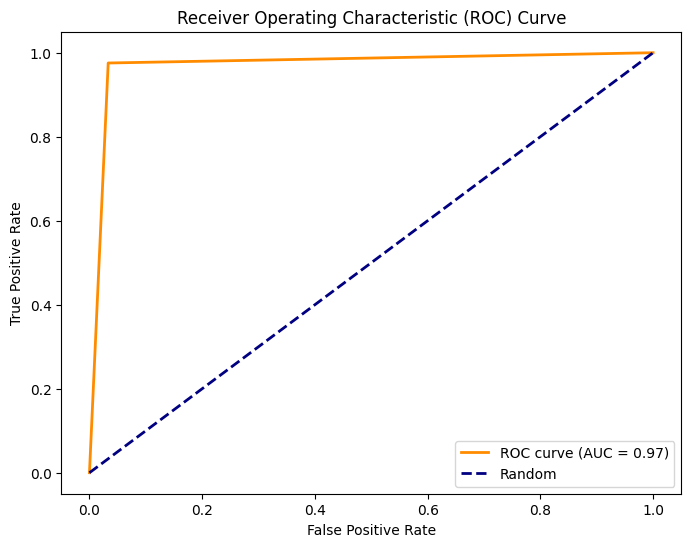

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, knn_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [105]:
# minkowski distance
knn_m = KNeighborsClassifier(n_neighbors=30, metric="minkowski", p=4)
knn_m.fit(X_train, y_train)
knn_predictions = knn_m.predict(X_test)
print("Accuracy score: ", format(accuracy_score(y_test, knn_predictions), "%"))

Accuracy score:  97.063369%


TN: 278, FP: 8, FN: 11, TP: 350
Error rate: 8.017001545595054
Precision: 0.9776536312849162
Recall :0.9695290858725761
f1-score: 0.9735744089012517
Specifity : 0.972027972027972
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       361
           1       0.96      0.97      0.97       286

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



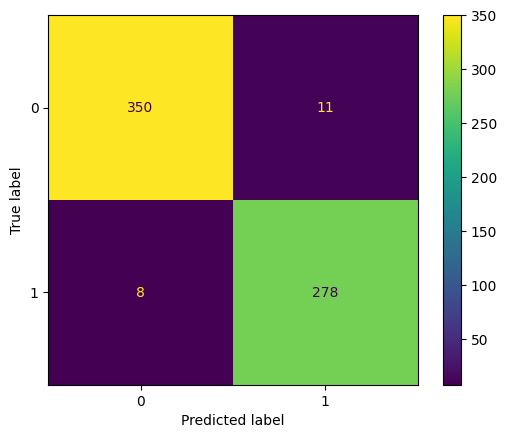

In [106]:
# confusion matrix
#overfitting 
tp, fn, fp, tn = confusion_matrix(y_test, knn_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, knn_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

AUC (Area Under the Curve): 97.08%


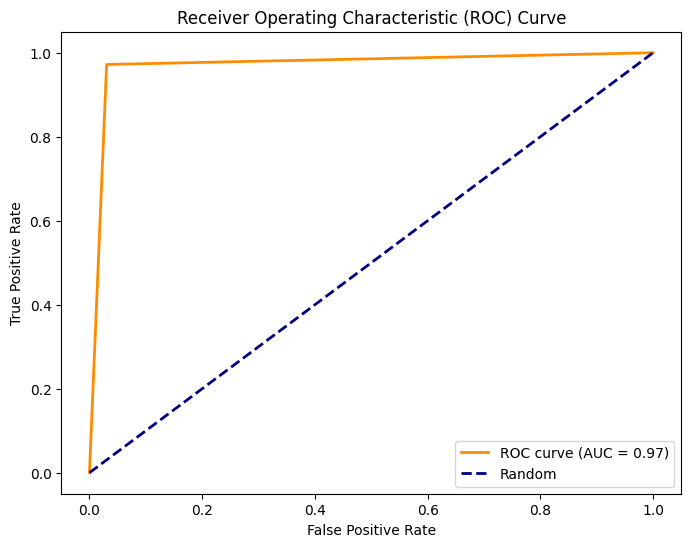

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, knn_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [108]:
# Manhattan distance
knn_m = KNeighborsClassifier(n_neighbors=30, metric="manhattan")
knn_m.fit(X_train, y_train)
knn_predictions = knn_m.predict(X_test)
print("Accuracy score: ", format(accuracy_score(y_test, knn_predictions), "%"))

Accuracy score:  96.908810%


TN: 278, FP: 8, FN: 12, TP: 349
Error rate: 8.018547140649149
Precision: 0.9775910364145658
Recall :0.9667590027700831
f1-score: 0.9721448467966574
Specifity : 0.972027972027972
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       361
           1       0.96      0.97      0.97       286

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



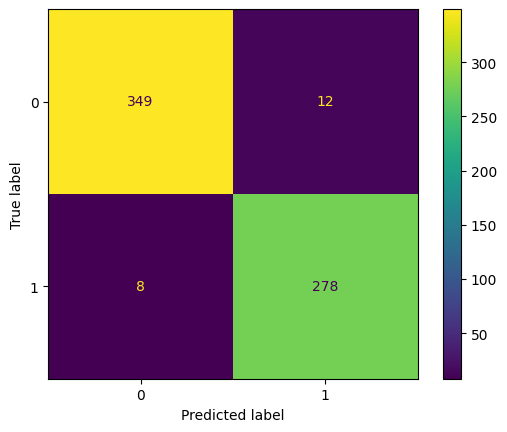

In [109]:
# confusion matrix
#overfitting 
tp, fn, fp, tn = confusion_matrix(y_test, knn_predictions).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Error rate: {fp+fn / (tp +fn+tn+ fp)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall :{tp / (tp + fn)}")
print(f"f1-score: {2*tp / (2*tp + fp+fn)}")
print(f"Specifity : {tn / (tn + fp)}")
print(classification_report(y_test, knn_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

AUC (Area Under the Curve): 96.94%


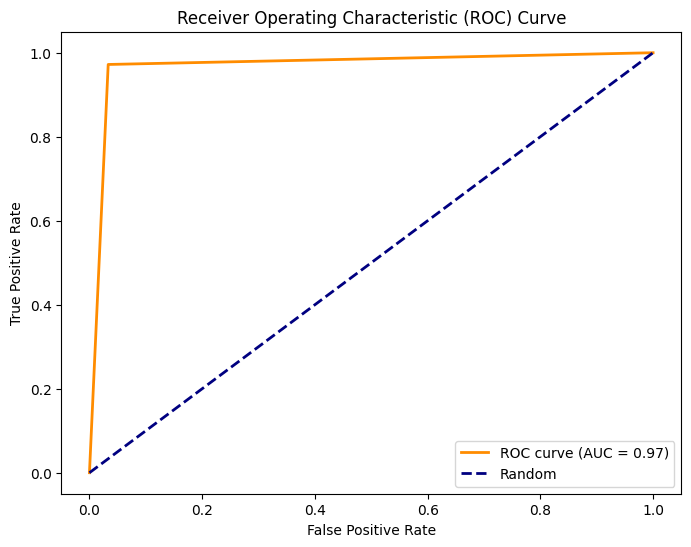

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, knn_predictions)
roc_auc = auc(fpr, tpr)
print("AUC (Area Under the Curve): {:.2%}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc)
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**References**\
https://ieeexplore.ieee.org/abstract/document/4914797 \
https://www.sciencedirect.com/science/article/pii/S0027968422001894 \
https://yadda.icm.edu.pl/baztech/element/bwmeta1.element.baztech-a20ea8bd-3717-4a64-8b41-8296ced61602
https://www.researchgate.net/profile/Geetha-Guttikonda-2/publication/263029369_Gender_Classification_using_Geometric_Facial_Features/links/5ee32dd1a6fdcc73be73a0cf/Gender-Classification-using-Geometric-Facial-Features.pdf \